(3000, 1)
               0
0  156157.201132
1  175511.978959
2  170596.412653
3  175972.715585
4  174419.258908


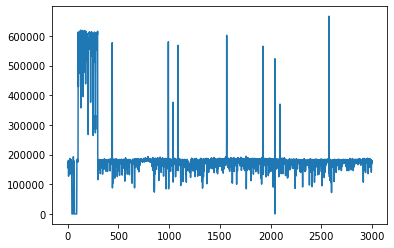

In [79]:
from pandas import datetime
import pandas as pd
from matplotlib import pyplot
from sklearn.externals import joblib
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


series = joblib.load("hour_resampled_data.pkl")
#series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
sample = series
sample = np.array(sample)
sample = sample[3000:4500,1:2]

series  = np.array(series)
series = series[:3000,1:2]
print(series.shape)
series = pd.DataFrame(series)
#series.drop(axis = "index")
print(series.head())
pyplot.plot(series)
pyplot.show()

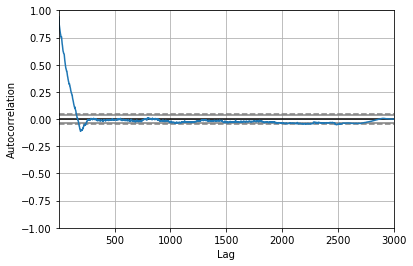

In [73]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2999
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -35540.523
Method:                       css-mle   S.D. of innovations          33921.293
Date:                Sun, 15 Dec 2019   AIC                          71095.046
Time:                        20:07:31   BIC                          71137.088
Sample:                             1   HQIC                         71110.168
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5309    320.107      0.024      0.981    -619.867     634.929
ar.L1.D.y     -0.1848      0.018    -10.157      0.000      -0.220      -0.149
ar.L2.D.y     -0.3509      0.018    -19.142      0.0

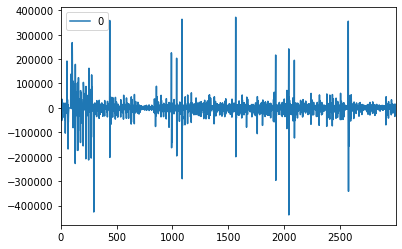

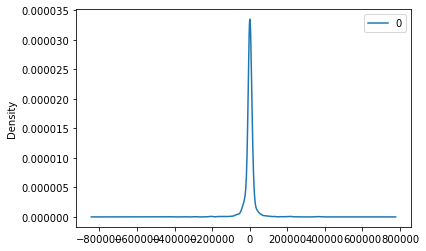

                   0
count    2999.000000
mean       -2.701498
std     33927.205844
min   -438562.477444
25%     -4796.885224
50%       170.322452
75%      7194.303458
max    371515.910946


In [74]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
series = np.array(series)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=175277.244623, expected=181566.679456
predicted=175461.171345, expected=175736.260070
predicted=162354.339537, expected=80550.880691
(150, 1)
(150, 1)
Test MSE: 221508374.338
RMSE : 14883.157
MAE : 8625.607


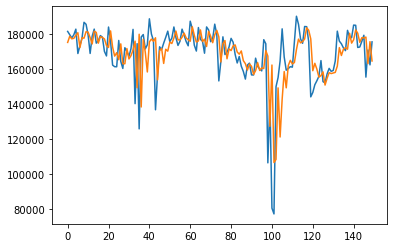

In [80]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = sample
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)): 
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    if(t%50==0):
        print('predicted=%f, expected=%f' % (yhat, obs))

predictions = np.array(predictions)        
print(predictions.shape)
print(test.shape)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print("RMSE : %.3f"%(np.sqrt(error)))
print("MAE : %.3f"%(mean_absolute_error(test,predictions)))

# plot
pyplot.plot(test)
pyplot.plot(predictions)

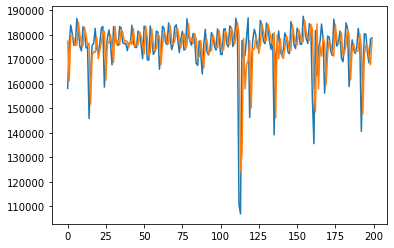

In [76]:
pyplot.plot(test[100:300,:])
pyplot.plot(predictions[100:300,:])

In [71]:
def mean_abs_pct_error(actual_values, forecast_values):

    err=0
    actual_values = pd.DataFrame(actual_values)
    forecast_values = pd.DataFrame(forecast_values)
    for i in range(len(forecast_values)):

        err += np.abs(actual_values.values[i] - forecast_values.values[i])/actual_values.values[i]

    return err[0] * 100/len(forecast_values) 

mean_abs_pct_error(test,predictions)

C:\Users\Neil\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


inf